#GRIP @ THE SPARKS FOUNDATION

---



##INTERNSHIP TASK-3

# Exploratory Data Analysis - Retail

##By Samarth Agarwal

In [ ]:
!pip install dataprep  
!pip install pandas-profiling==2.7.1
#would require to restart runtime

In [ ]:
# Dataset: https://bit.ly/3i4rbWl

IMPORT LIBRARIES

In [ ]:
from dataprep.eda import plot,plot_correlation

NumExpr defaulting to 2 threads.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_excel('/content/SampleSuperstore.xlsx')  #Extracting the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.head()

Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]

In [ ]:
df.describe().T

count          mean  ...        75%        max
Postal Code  9994.0  55190.379428  ...  90008.000  99301.000
Sales        9994.0    229.858001  ...    209.940  22638.480
Quantity     9994.0      3.789574  ...      5.000     14.000
Discount     9994.0      0.156203  ...      0.200      0.800
Profit       9994.0     28.656896  ...     29.364   8399.976

[5 rows x 8 columns]

##**DESCRIPTIVE STATISTICS & MISSING VALUES**


---






In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

##Removing constant columns & duplicate rows 

---



---



In [ ]:
df=df.drop('Country',axis=1)

In [ ]:
df.drop_duplicates(inplace=True)


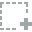
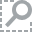
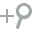
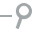
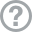
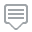
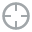
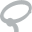
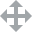
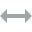
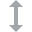
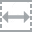
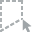
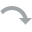
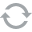
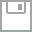
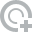
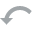
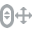
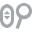
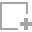
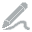
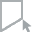
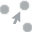
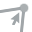

In [ ]:
plot(df,'Profit')

##Analysing profit by sales,quantity& category

In [ ]:
plot(df,'Sub-Category','Profit',ngroups=18)

In [ ]:
plot(df,'City','Sub-Category',ngroups=18)

In [ ]:
plot(df,'City','Profit',ngroups=18)

In [ ]:
plot(df,'Category','Profit')

In [ ]:
plot(df,'Sales','Profit')

In [ ]:
plot(df,'Quantity','Profit')

In [ ]:
plot(df,'Discount','Profit')

##Conclusions
-Prominent outliers in sales & discount so I have used quantile. 

-With increase in discount the profit decreases.


In [ ]:
print(df['Discount'].quantile(0.10),df['Discount'].quantile(0.90))
print(df['Sales'].quantile(0.10),df['Sales'].quantile(0.90))


0.0 0.4
7.8936 572.9495999999998


In [ ]:
df2=df.copy()
df2["Sales"] = np.where(df["Sales"] <7.8936,7.8936,df['Sales'])
df2["Sales"] = np.where(df["Sales"] >572.949,572.949,df['Sales'])
df2["Discount"] = np.where(df["Discount"] <0.0, 0.0,df['Discount'])
df2["Discount"] = np.where(df["Discount"] >0.4, 0.4,df['Discount'])

In [ ]:
plot(df2,'Discount','Profit')

In [ ]:
plot(df2,'Sales','Profit')

##Quantity and sales have high correlation with profit

---



---



In [ ]:
plot_correlation(df2)

In [ ]:
plot_correlation(df2,'Profit')